In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [15]:
sns.set(font_scale=1.5)

In [96]:
def plot_ci(ci_csv, title, output_fname):
    df = pd.read_csv(ci_csv)
    df['observed_coverage'] = df['ci_coverage']
    gammas = sorted(df.gamma.unique())
    ncols = len(gammas)
    fig, axes = plt.subplots(2, ncols, figsize = (5 * ncols, 8), sharey='row')#, sharex=True)
    for j in range(ncols):
        ax = axes[0][j]
        gamma = gammas[j]
        subdf = df.query(
            f'gamma == {gamma}'
        ).groupby(
            ['algorithm', 'rho']
        ).mean(
        ).reset_index()
        sns.lineplot(
            data=subdf, 
            x='rho', 
            y='observed_coverage', 
            hue='algorithm',
            hue_order=['solution', 'baseline'],
            ax=ax
        )
        ax.axhline(gamma, ls='--', c='g', label='nominal coverage')
        ax.legend()
        ax.set_xscale('log')
        ax.set_title(f'gamma = {gamma}')
    for j in range(ncols):
        ax = axes[1][j]
        gamma = gammas[j]
        subdf = df.query(
            f'gamma == {gamma}'
        )
#         .groupby(
#             ['algorithm', 'rho']
#         ).mean(
#         ).reset_index()
        sns.lineplot(
            data=subdf, 
            x='rho', 
            y='ci_width', 
            hue='algorithm',
            hue_order=['solution', 'baseline'],
            ax=ax
        )
        ax.set_xscale('log')
        ax.set_title(f'gamma = {gamma}')
    fig.suptitle(title)
    fig.tight_layout()
    fig.savefig(output_fname, bbox_inches='tight')
    
def plot_topk(topk_csv, title, output_fname):
    df = pd.read_csv(topk_csv)
    df['kth_gap'] = df['kth_score_gap']
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (12, 6))#, sharex=True)
    
    ax = ax0
    sns.lineplot(
        data=df, 
        x='rho', 
        y='kth_gap', 
        hue='algorithm',
        ax=ax
    )
    ax.set_xscale('log')
    #ax.set_yscale('symlog')
    ax.set_title(f'kth gap')
    
    ax = ax1
    sns.lineplot(
        data=df, 
        x='rho', 
        y='precision_at_k', 
        hue='algorithm',
        hue_order=['solution', 'baseline'],
        ax=ax
    )
    ax.set_xscale('log')
    ax.set_title(f'precision@k')
    
    fig.suptitle(title)
    fig.tight_layout()
    fig.savefig(output_fname, bbox_inches='tight')
    

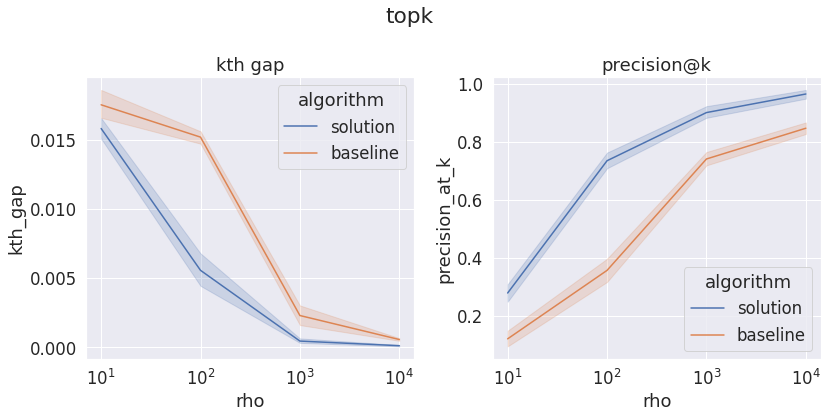

In [97]:
plot_topk('./records/topk.csv', 'topk', './plots/topk.pdf')

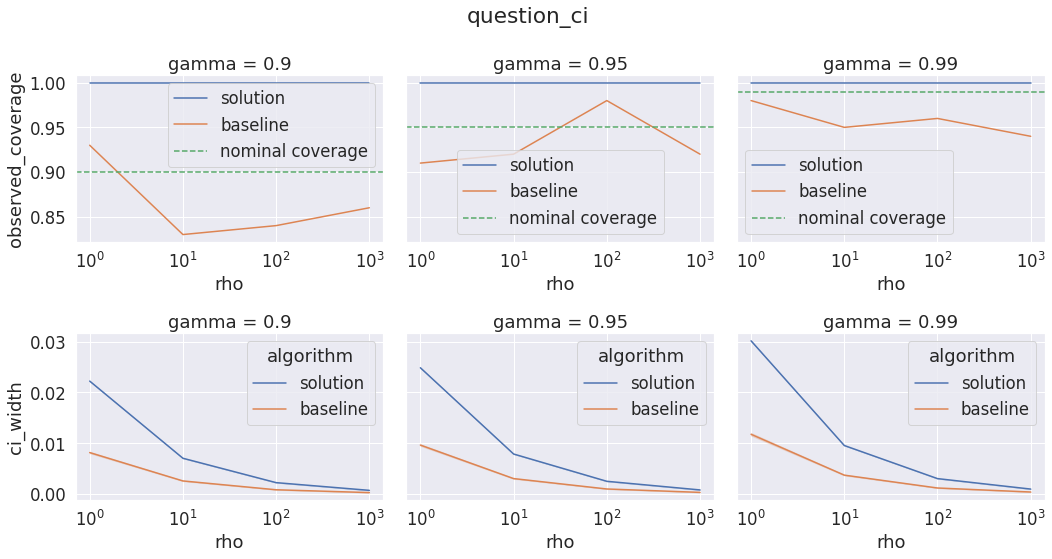

In [98]:
plot_ci('./records/question_ci.csv', 'question_ci', './plots/question_ci.pdf')

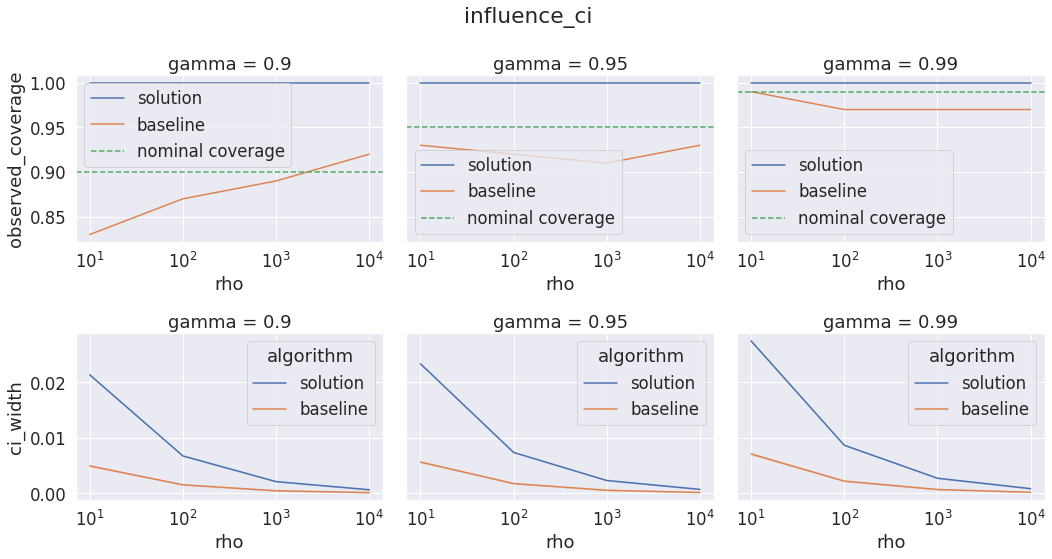

In [99]:
plot_ci('./records/influence_ci.csv', 'influence_ci', './plots/influence_ci.pdf')

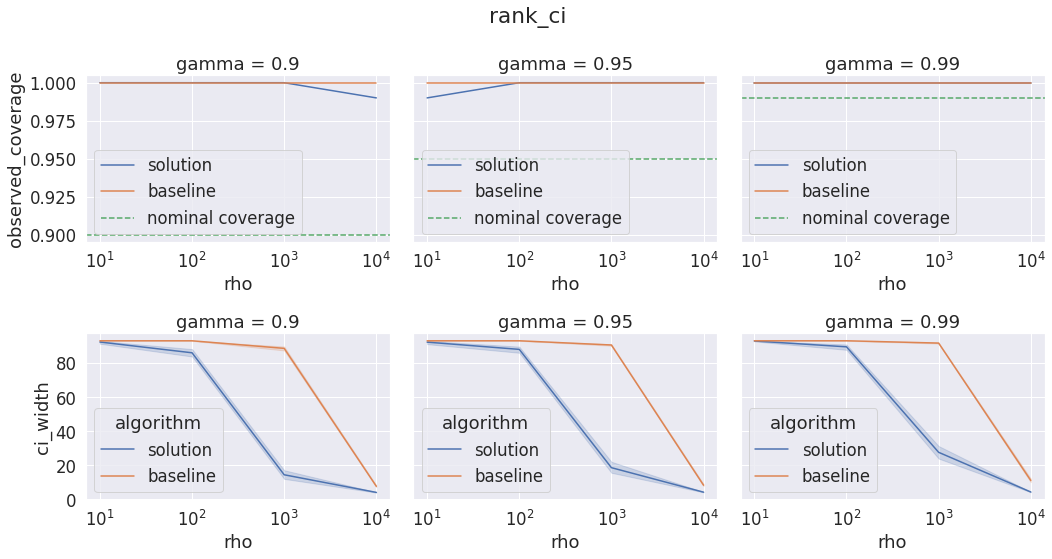

In [100]:
plot_ci('./records/rank_ci.csv', 'rank_ci', './plots/rank_ci.pdf')